# House Market

Imagine you are a real estate investor in King County, USA. You want to buy a house and resell it for the highest possible profit. In this project, we will explore home sales data in the region with the goal of answering the following questions:

- Which house should you buy? What is the estimated purchase cost?
- When should the house be sold? For how much?
- Should you renovate the house to increase the selling price? What renovation suggestions could be made? What is the estimated price increase for each renovation option?

Imagine que você é um investidor imobiliário em King County, USA. Você deseja comprar um casa e revendê-la, obtendo o maior lucro possível. Neste projeto, iremos explorar os dados de vendas de casas na região, com o objetivo de responder às seguintes perguntas:
- Qual casa você deve comprar? Qual o custo estimado de compra?
- Quando a casa deve ser vendida? Por qual valor?
- Você fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

## Data Preprocessing

In [2005]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2006]:
# load the dataset
kc_house_df = pd.read_csv("datasets/kc_house_data.csv")

In [2007]:
# lets take a look at our data
kc_house_df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [2008]:
# dataset columns
kc_house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [2009]:
# look for missing values
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2010]:
# convert 'date' column to datetime format
kc_house_df["date"] = pd.to_datetime(kc_house_df["date"], format="%Y%m%dT%H%M%S")

In [2011]:
kc_house_df["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [2012]:
def plot_distribution(mu, sigma):
    # defining theme
    sns.set_theme(style="white")
    colors = sns.color_palette("viridis", n_colors=1)

    # plotting the SAT score distribution using Seaborn with a KDE (Kernel Density Estimate) plot
    plt.figure(figsize=(10, 6))
    sns.histplot(kc_house_df['price'], kde=True, color=colors[0])

    # Remove left and bottom spines to eliminate the box
    sns.despine(left=True, bottom=True)

    # set the title and labels
    plt.title("House Prices Distribution", fontsize=18, color='darkgreen')
    plt.xlabel("SAT Scores", fontsize=14, color='darkgreen')
    plt.ylabel("Density", fontsize=14, color='darkgreen')

    # Set the color of tick labels on both axes
    plt.xticks(color='orange')
    plt.yticks(color='orange')

    plt.show()

In [2013]:
# calculate the mean and standard deviation of the 'price' column
mu = kc_house_df["price"].mean()
sigma = kc_house_df["price"].std()
print("The mean is", round(mu, 3))
print("The standard deviation is", round(sigma, 3))

The mean is 540088.142
The standard deviation is 367127.196


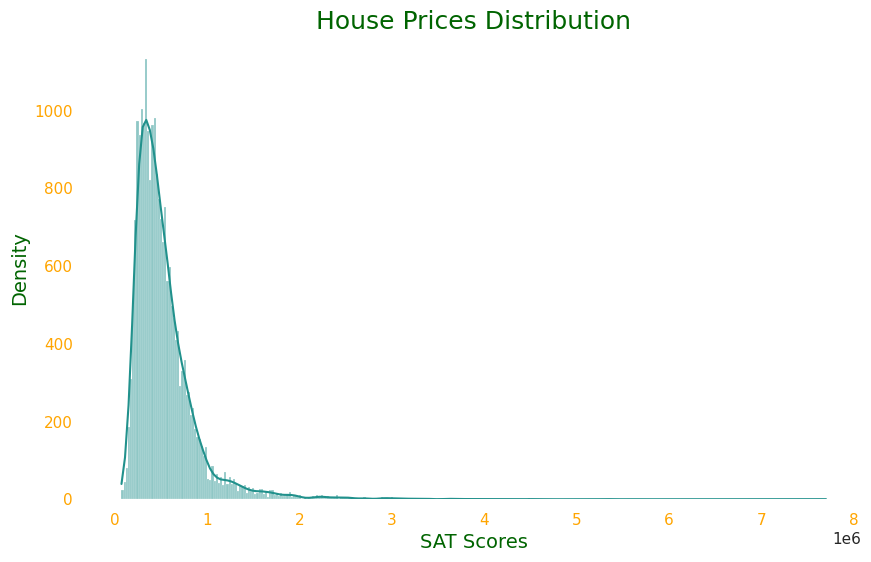

In [2014]:
plot_distribution(mu, sigma)

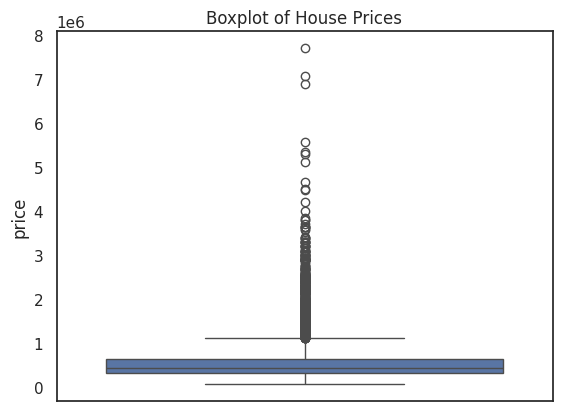

In [2015]:
# looking for outliers in the 'price' column
sns.boxplot(kc_house_df['price'])
plt.title('Boxplot of House Prices')
plt.show()

In [2016]:
# treating outliers in the 'price' column (IQR method)
Q1 = kc_house_df['price'].quantile(0.25)
Q3 = kc_house_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
kc_house_df = kc_house_df[(kc_house_df['price'] >= lower) & (kc_house_df['price'] <= upper)]

In [2017]:
# looking for duplicates
duplicates = kc_house_df.duplicated()
print(f"Number of duplicated rows: {duplicates.sum()}")

Number of duplicated rows: 0


In [2018]:
# calculate the mean and standard deviation of the 'price' column
mu = kc_house_df["price"].mean()
sigma = kc_house_df["price"].std()
print("The mean is", round(mu, 3))
print("The standard deviation is", round(sigma, 3))

The mean is 476984.559
The standard deviation is 208371.262


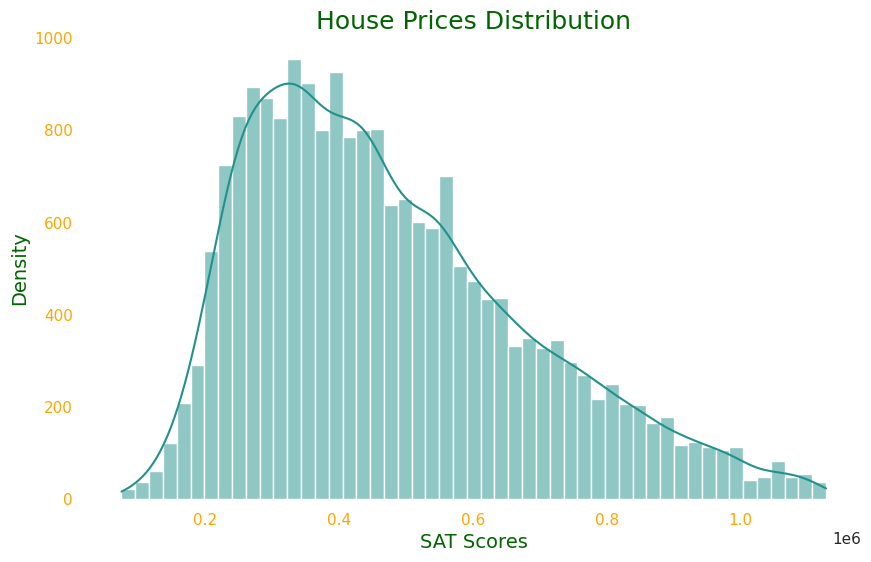

In [2019]:
plot_distribution(mu, sigma)

## Exploratory Data Analisys (EDA)

### House Location

In [2020]:
px.scatter_map(lat=kc_house_df["lat"], lon=kc_house_df["long"], map_style="open-street-map", title="House Prices in King County, WA", zoom=8, height=600, width=800)

In [2021]:
# how close to downtown Seattle are the houses?
downtown_seattle = [47.6062, -122.3321] 
kc_house_df["distance_to_downtown"] = np.sqrt((kc_house_df["lat"] - downtown_seattle[0]) ** 2 + (kc_house_df["long"] - downtown_seattle[1]) ** 2)

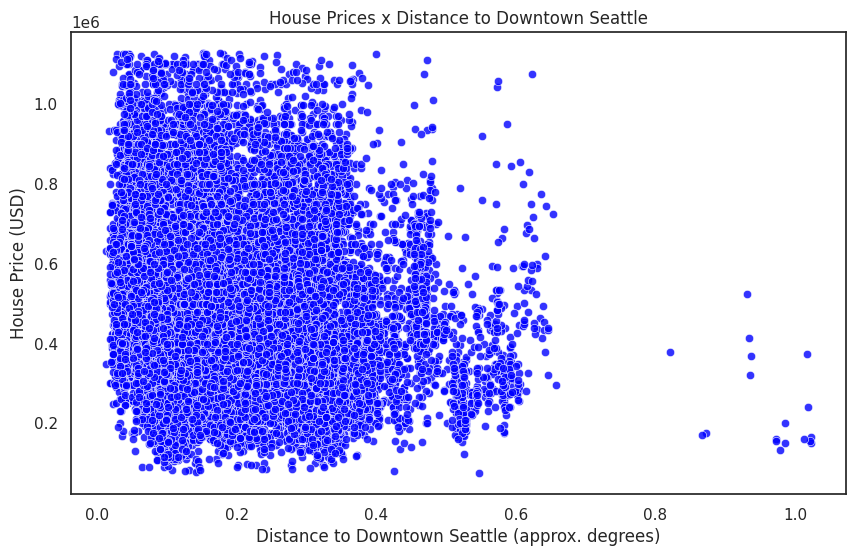

In [2022]:
# House Prices x Distance to Downtown Seattle
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="distance_to_downtown", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Distance to Downtown Seattle")
plt.xlabel("Distance to Downtown Seattle (approx. degrees)")
plt.ylabel("House Price (USD)")
plt.show()

In [2023]:
# correlation distance to downtown and price
kc_house_df["distance_to_downtown"].corr(kc_house_df["price"])

np.float64(-0.17878094014647847)

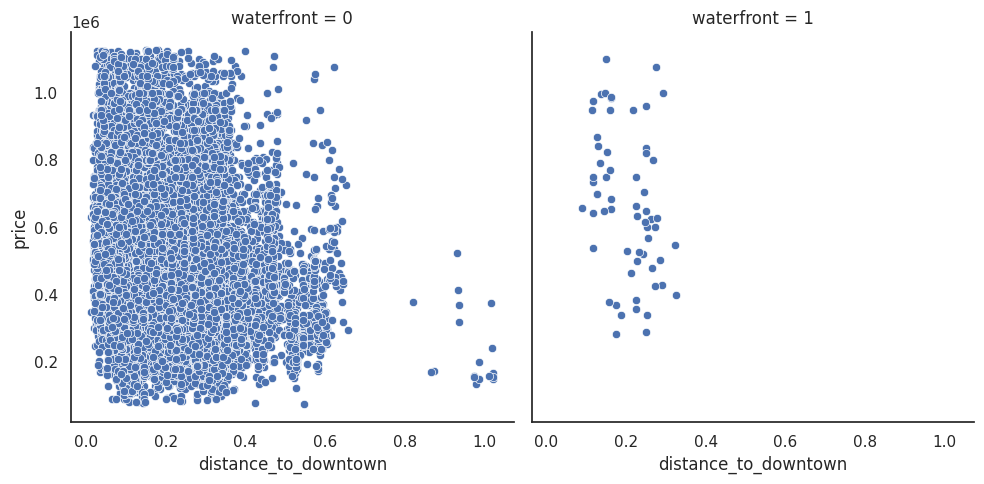

In [2024]:
# waterfront properties and non-waterfront properties
sns.relplot(
    data=kc_house_df, x="distance_to_downtown", y="price",
    col="waterfront",
    kind="scatter"
)

In [2025]:
# correlation waterfront and price
kc_house_df["waterfront"].corr(kc_house_df["price"])

np.float64(0.05144865772068534)

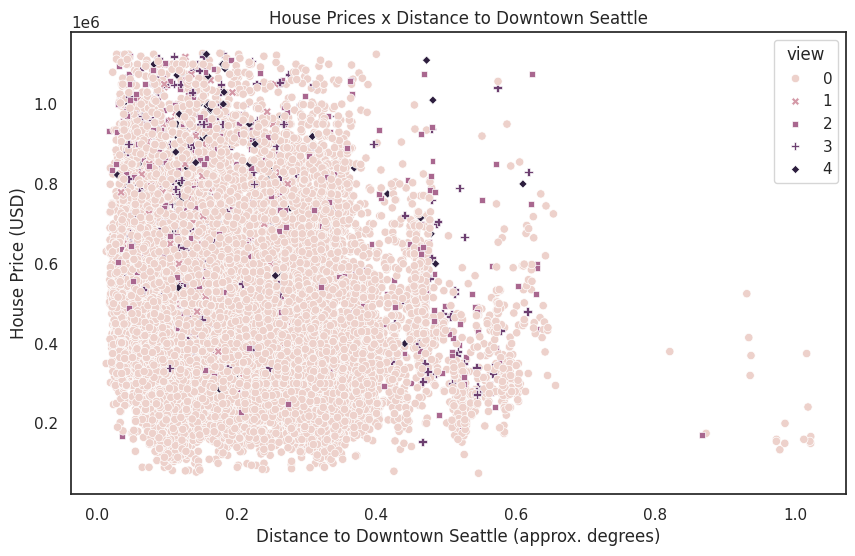

In [2026]:
# how the view impacts house prices?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="distance_to_downtown", y="price", hue="view", style="view")
plt.legend(title="view", loc='upper right')
plt.title("House Prices x Distance to Downtown Seattle")
plt.xlabel("Distance to Downtown Seattle (approx. degrees)")
plt.ylabel("House Price (USD)")
plt.show()

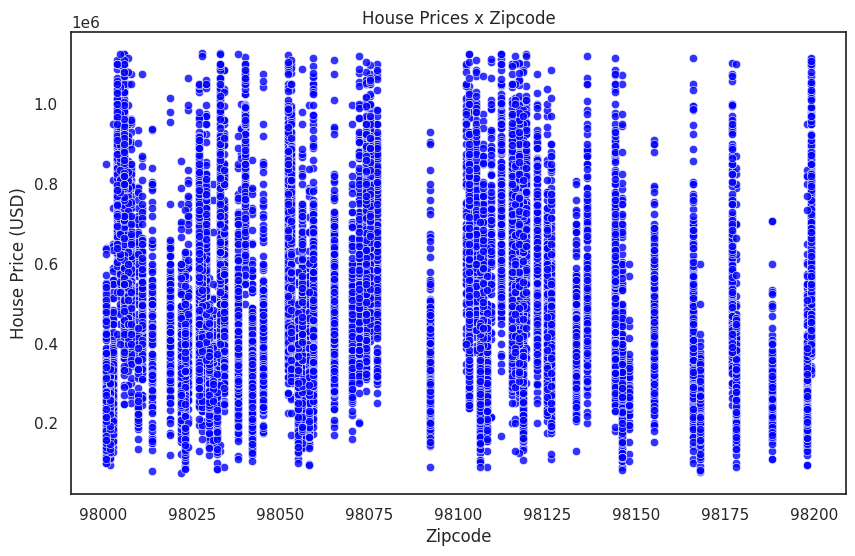

In [2027]:
# House Prices x Zipcode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="zipcode", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("House Price (USD)")
plt.show()

In [2028]:
# correlation zipcode and price
kc_house_df["zipcode"].corr(kc_house_df["price"])

np.float64(-0.01851064139675838)

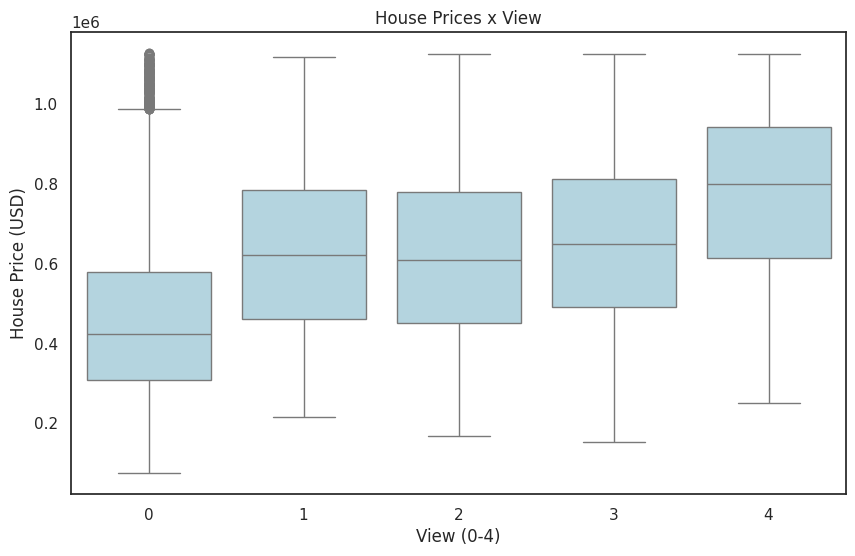

In [2029]:
# House Prices and View
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="view", y="price", color="lightblue")
plt.title("House Prices x View")
plt.xlabel("View (0-4)")
plt.ylabel("House Price (USD)")
plt.show()

In [2030]:
# correlation view and price
kc_house_df["view"].corr(kc_house_df["price"])

np.float64(0.23826771526989488)

### House Area

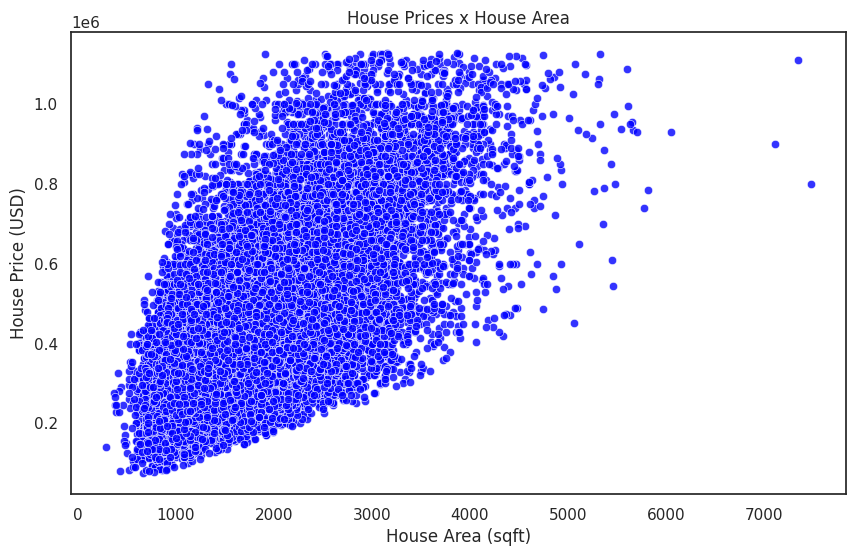

In [2031]:
# House Prices and House Area (sqft_living)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_living", y="price", alpha=0.8, color="blue")
plt.title("House Prices x House Area")
plt.xlabel("House Area (sqft)")
plt.ylabel("House Price (USD)")
plt.show()

In [2032]:
# correlation view and price
kc_house_df["sqft_living"].corr(kc_house_df["price"])

np.float64(0.6223329300291792)

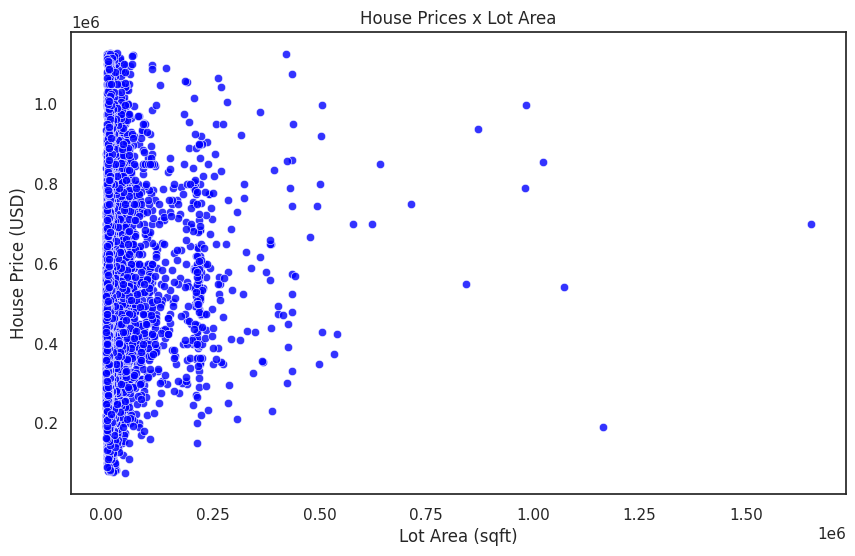

In [2033]:
# House Prices and Lot Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_lot", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Lot Area")
plt.xlabel("Lot Area (sqft)")
plt.ylabel("House Price (USD)")
plt.show()

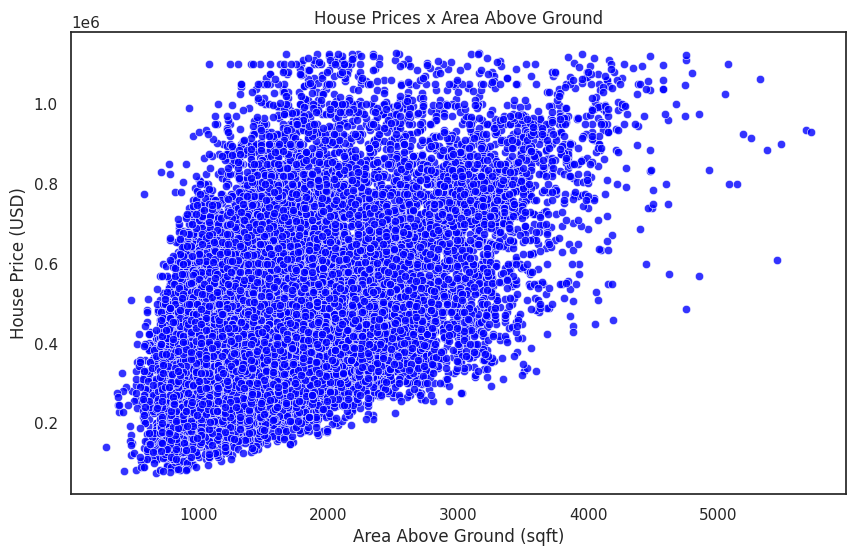

In [2034]:
# House Prices and Area Above Ground 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_above", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Area Above Ground")
plt.xlabel("Area Above Ground (sqft)")
plt.ylabel("House Price (USD)")
plt.show()

In [2035]:
# correlation area above ground and price
kc_house_df["sqft_above"].corr(kc_house_df["price"])

np.float64(0.5304509325686367)

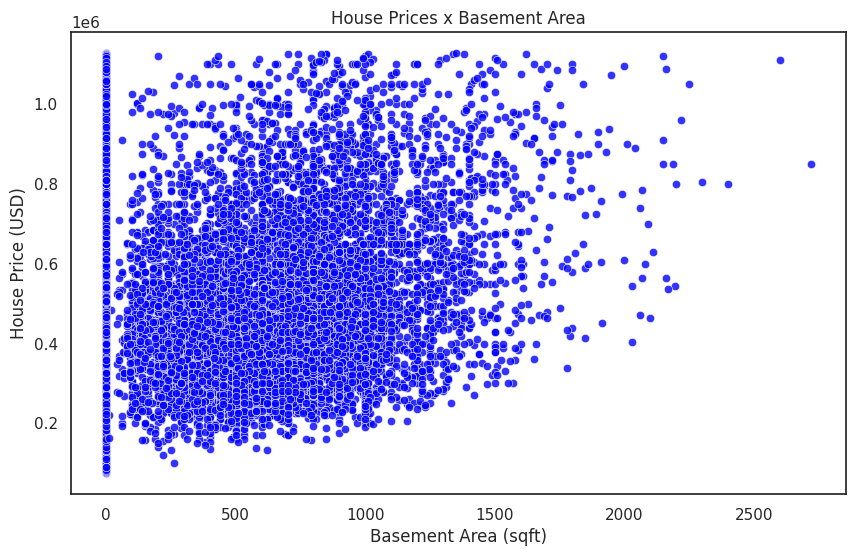

In [2036]:
# House Prices and Basement Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_basement", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Basement Area")
plt.xlabel("Basement Area (sqft)")
plt.ylabel("House Price (USD)")
plt.show()

In [2037]:
# correlation basement area and price
kc_house_df["sqft_basement"].corr(kc_house_df["price"])

np.float64(0.2357012940368372)

### General

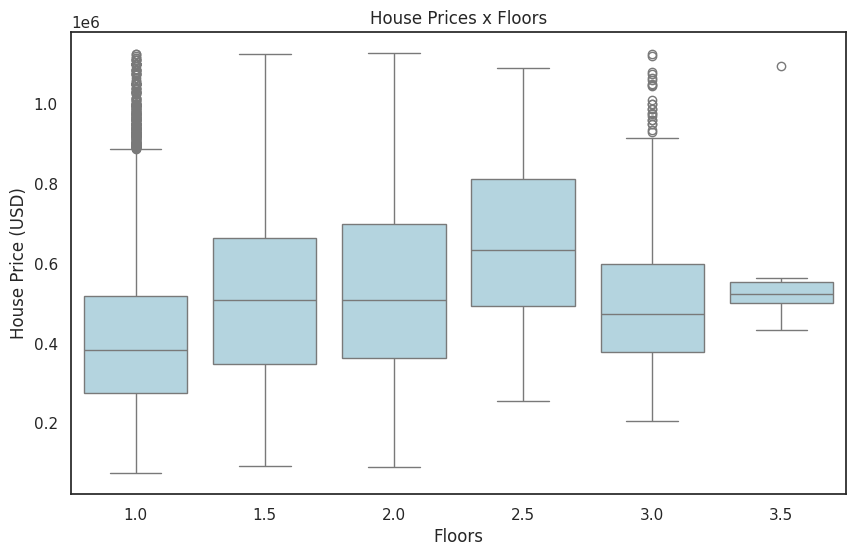

In [2038]:
# House Prices and Floors
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="floors", y="price", color="lightblue")
plt.title("House Prices x Floors")
plt.xlabel("Floors")
plt.ylabel("House Price (USD)")
plt.show()

In [2039]:
# correlation view x price
kc_house_df["floors"].corr(kc_house_df["price"])

np.float64(0.273986815864062)

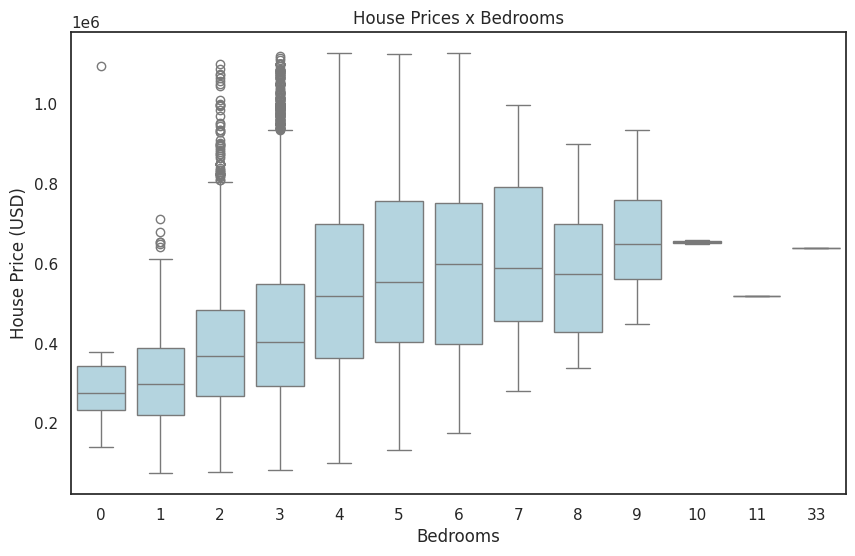

In [2040]:
# House Prices and Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="bedrooms", y="price", color="lightblue")
plt.title("House Prices x Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("House Price (USD)")
plt.show()

In [2041]:
# correlation number of bedrooms and price
kc_house_df["bedrooms"].corr(kc_house_df["price"])

np.float64(0.29695607738366)

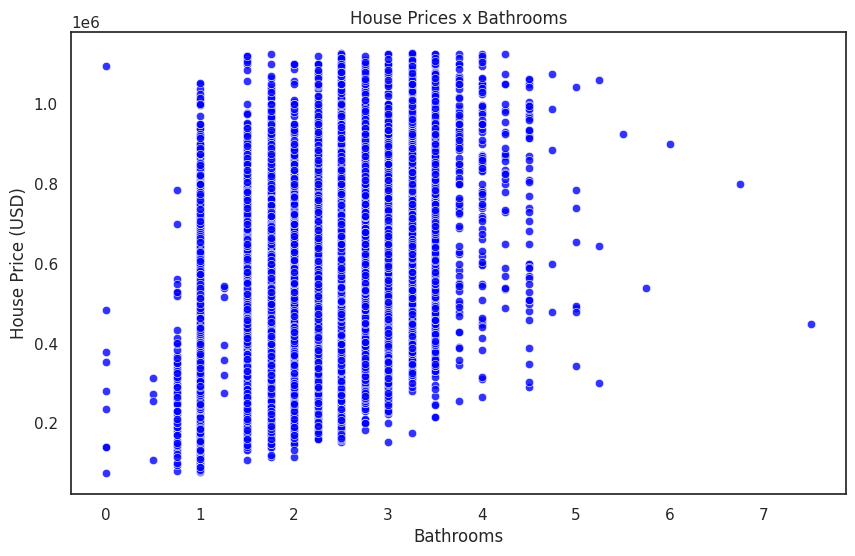

In [2042]:
# House Prices and Bathrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="bathrooms", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("House Price (USD)")
plt.show()

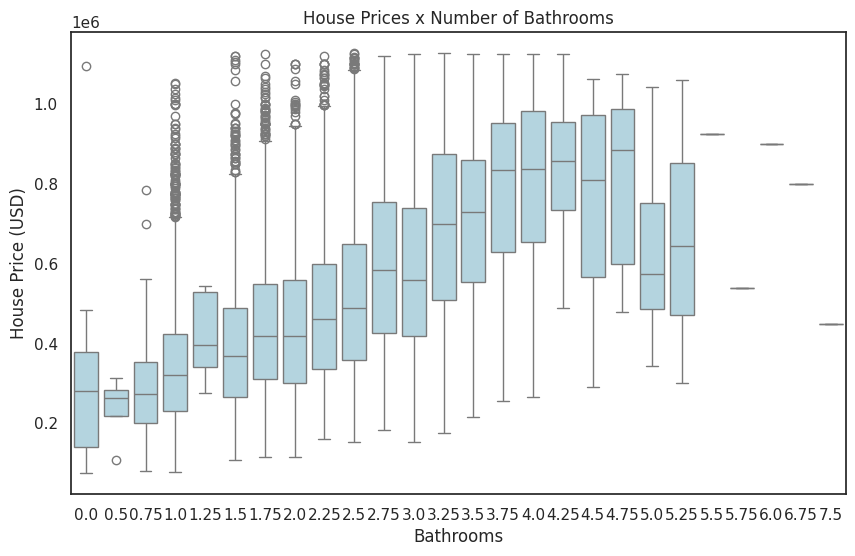

In [2043]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="bathrooms", y="price", color="lightblue")
plt.title("House Prices x Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("House Price (USD)")
plt.show()

In [2044]:
# correlation number of bathrooms and price
kc_house_df["bathrooms"].corr(kc_house_df["price"])

np.float64(0.45592734637886545)

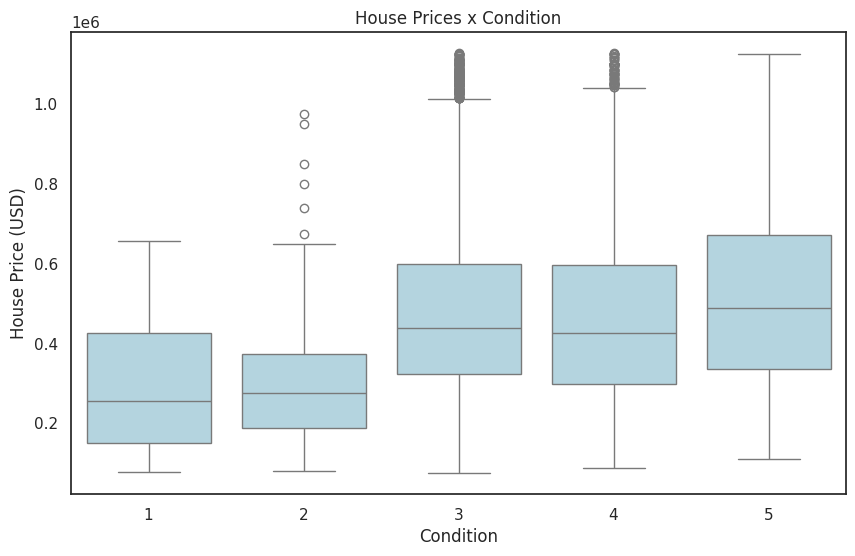

In [2045]:
# House Prices and Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="condition", y="price", color="lightblue")
plt.title("House Prices x Condition")
plt.xlabel("Condition")
plt.ylabel("House Price (USD)")
plt.show()

In [2046]:
# correlation condition and price
kc_house_df["condition"].corr(kc_house_df["price"])

np.float64(0.03827501350180621)

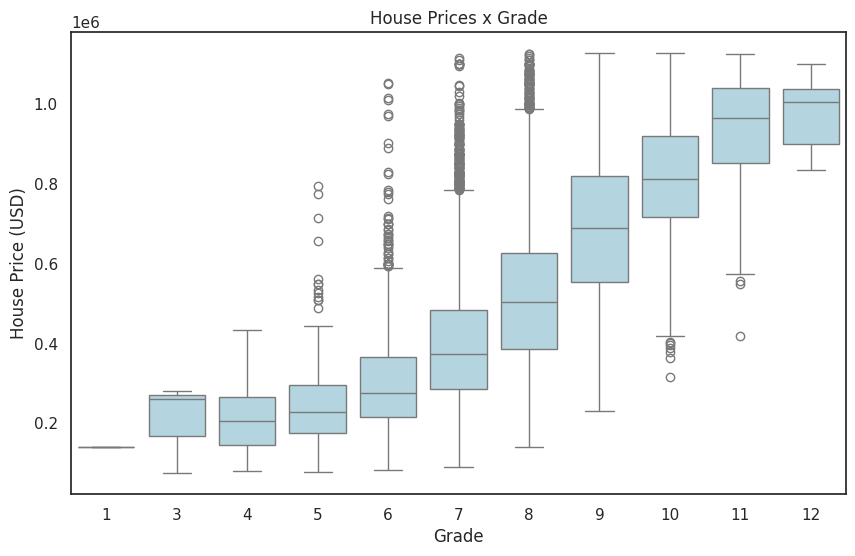

In [2047]:
# House Prices and Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=kc_house_df, x="grade", y="price", color="lightblue")
plt.title("House Prices x Grade")
plt.xlabel("Grade")
plt.ylabel("House Price (USD)")
plt.show()

In [2048]:
# correlation grade and price
kc_house_df["grade"].corr(kc_house_df["price"])

np.float64(0.6311822922614067)

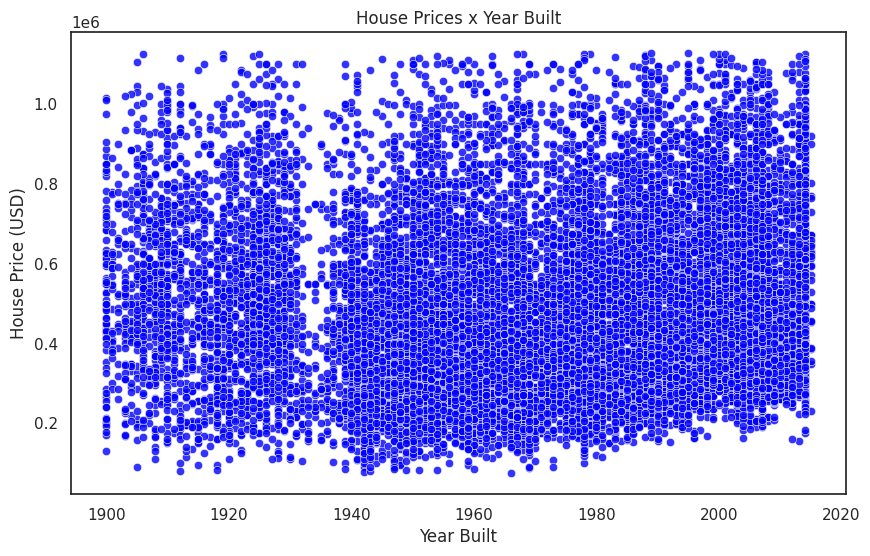

In [2049]:
# House Prices and Year Built
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="yr_built", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Year Built")
plt.xlabel("Year Built")
plt.ylabel("House Price (USD)")
plt.show()

In [2050]:
# correlation grade and year built
kc_house_df["yr_built"].corr(kc_house_df["price"])

np.float64(0.06114392021646455)

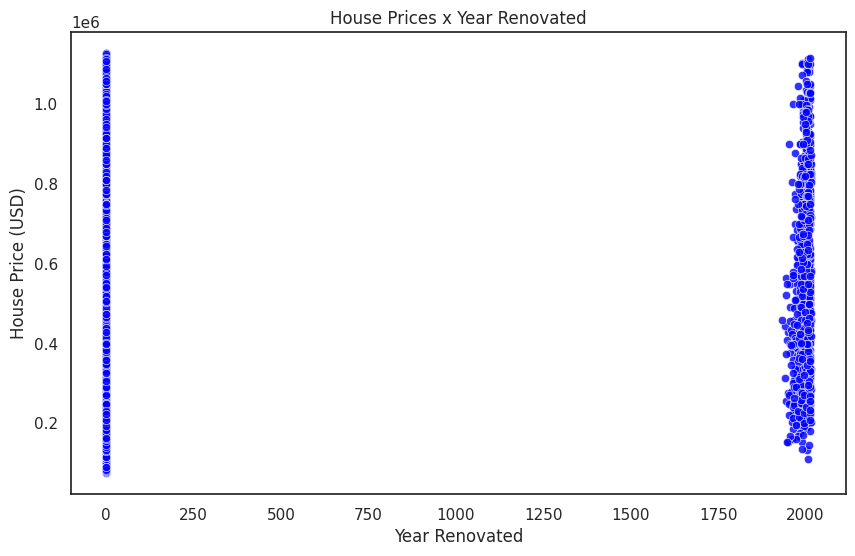

In [2051]:
# House Prices and Year Renovated
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="yr_renovated", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Year Renovated")
plt.xlabel("Year Renovated")
plt.ylabel("House Price (USD)")
plt.show()

In [2052]:
# correlation grade and year renovated
kc_house_df["yr_renovated"].corr(kc_house_df["price"])

np.float64(0.08360102568224527)

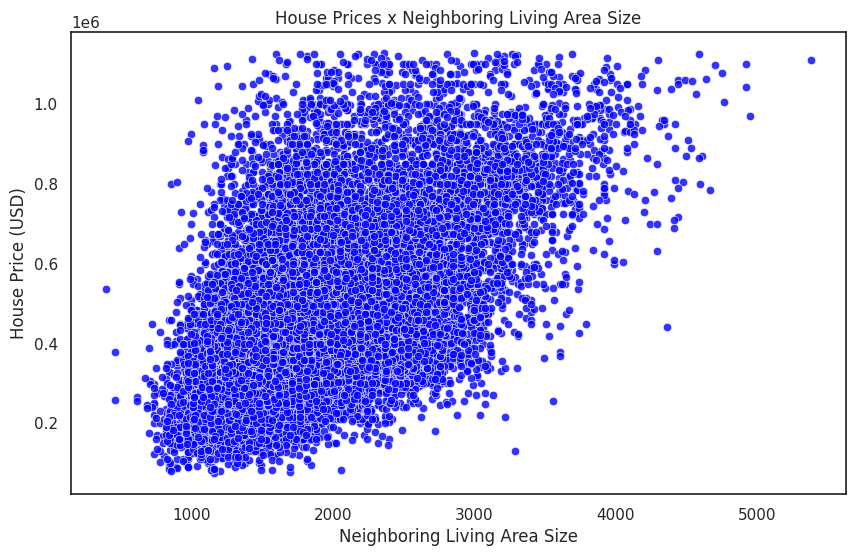

In [2053]:
# House Prices and Size of Living Area in 15 Nearest Neighbors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_living15", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Neighboring Living Area Size")
plt.xlabel("Neighboring Living Area Size")
plt.ylabel("House Price (USD)")
plt.show()

In [2054]:
# correlation grade and living area in 15 nearest Neighbors
kc_house_df["sqft_living15"].corr(kc_house_df["price"])

np.float64(0.5620895088977601)

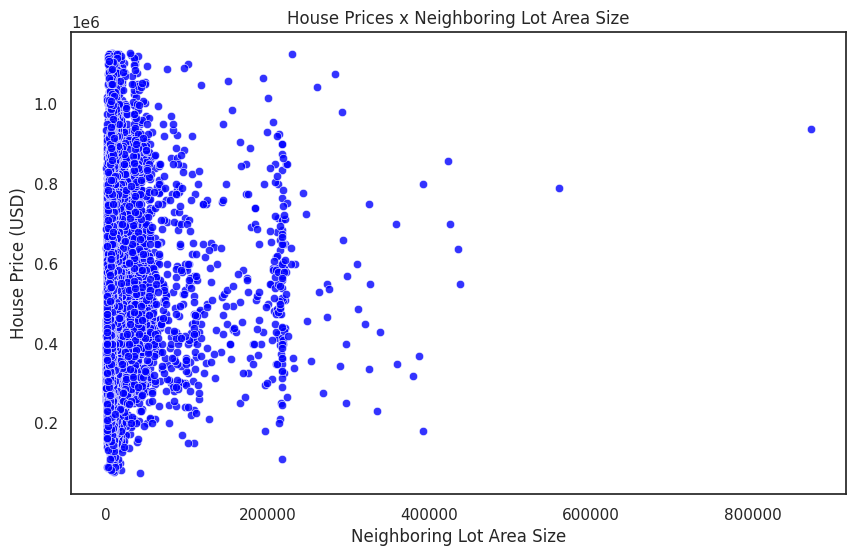

In [2055]:
# House Prices and Size of Lot Area in 15 Nearest Neighbors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kc_house_df, x="sqft_lot15", y="price", alpha=0.8, color="blue")
plt.title("House Prices x Neighboring Lot Area Size")
plt.xlabel("Neighboring Lot Area Size")
plt.ylabel("House Price (USD)")
plt.show()

In [2056]:
# correlation grade and living area in 15 nearest Neighbors
kc_house_df["sqft_lot15"].corr(kc_house_df["price"])

np.float64(0.08242009072388921)

### Which House Features Most Influence the Price?
Key features that significantly influence the value of the houses include the **view**, **living area**, **above-ground area**, number of **bathrooms**, **grade**, and the average **living area of the fifteen nearest neighbors**.

In [2057]:
# correlation of the most important features
df_subset = kc_house_df[["bathrooms", "sqft_living", "view", "grade", "sqft_above", "sqft_living15", "price"]]
corr_matrix = df_subset.corr()

<Axes: >

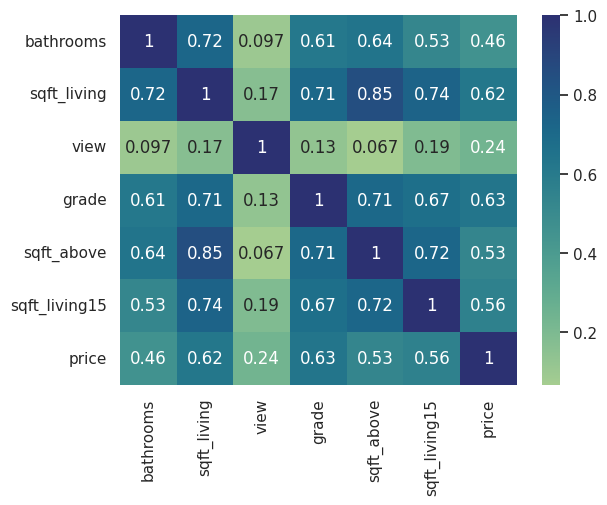

In [2058]:
# plot heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="crest", annot=True)

### Which house should we buy?
Understanding housing price volatility: types of properties more susceptible to price swings

##### Standart Price Deviation
Select the group of houses with the highest standart deviation


In [2059]:
kc_house_df["sqft_living15"].describe()

count    20467.000000
mean      1922.255191
std        614.932010
min        399.000000
25%       1470.000000
50%       1800.000000
75%       2280.000000
max       5380.000000
Name: sqft_living15, dtype: float64

In [2060]:
# creating bins for sqft_living15
kc_house_df['sqft_living15_bin'] = pd.qcut(kc_house_df['sqft_living15'], q=10, duplicates='drop')

In [2061]:
# creating bins for sqft_living
kc_house_df['sqft_living_bin'] = pd.qcut(kc_house_df['sqft_living'], q=10, duplicates='drop')

In [2062]:
def convert_date (date):
    return date.strftime('%Y-%m')

In [2063]:
# transforming the 'date' column to year-month for easier time series analysis
kc_house_df['year_month'] = kc_house_df['date'].map(convert_date)

In [2064]:
kc_house_df['year_month'].unique()

array(['2014-10', '2014-12', '2015-02', '2014-06', '2015-01', '2015-04',
       '2015-03', '2014-05', '2014-07', '2014-11', '2014-08', '2014-09',
       '2015-05'], dtype=object)

In [2065]:
group_cols = ["bathrooms", "sqft_living_bin", "grade", "sqft_living15_bin"]

In [2066]:
# grouping columns and filtering by minimum sales
threshold = 100
grouped_df = kc_house_df.groupby(by=group_cols, observed=False)['price'].agg(['count', 'std', 'mean']).reset_index()
grouped_df['cv'] = grouped_df['std'] / grouped_df['mean']
grouped_df_ranked_by_cv = grouped_df[grouped_df['count'] >= threshold].sort_values('cv', ascending=False)
grouped_df_ranked_by_cv.rename(columns={'std': 'price_std', 'mean': 'mean_price', 'count': 'sales_count'}, inplace=True)
grouped_df_ranked_by_cv.reset_index(drop=True, inplace=True)
grouped_df_ranked_by_cv.head()

bathrooms    sqft_living_bin  grade  sqft_living15_bin  sales_count  \
0        1.0   (1070.0, 1300.0]      6  (398.999, 1250.0]          166   
1        1.0   (1070.0, 1300.0]      7   (1250.0, 1400.0]          133   
2        1.0   (1070.0, 1300.0]      7   (1400.0, 1530.0]          122   
3        1.0  (289.999, 1070.0]      6   (1250.0, 1400.0]          138   
4        1.0  (289.999, 1070.0]      7   (1400.0, 1530.0]          119   

       price_std     mean_price        cv  
0  103541.272876  267557.644578  0.386987  
1  128951.133197  339145.578947  0.380224  
2  140387.610534  373710.450820  0.375659  
3  100735.919449  278526.731884  0.361674  
4  123833.517451  343515.571429  0.360489

In [2067]:
df_filtered = kc_house_df.merge(grouped_df[group_cols].drop_duplicates(), on=group_cols, how='inner')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    20467 non-null  int64         
 1   date                  20467 non-null  datetime64[ns]
 2   price                 20467 non-null  float64       
 3   bedrooms              20467 non-null  int64         
 4   bathrooms             20467 non-null  float64       
 5   sqft_living           20467 non-null  int64         
 6   sqft_lot              20467 non-null  int64         
 7   floors                20467 non-null  float64       
 8   waterfront            20467 non-null  int64         
 9   view                  20467 non-null  int64         
 10  condition             20467 non-null  int64         
 11  grade                 20467 non-null  int64         
 12  sqft_above            20467 non-null  int64         
 13  sqft_basement   

In [2068]:
new_group_cols = group_cols + ['year_month']
new_group_cols

['bathrooms', 'sqft_living_bin', 'grade', 'sqft_living15_bin', 'year_month']

In [2070]:
ranking_position = 3

def filtering_group(df, ranking_position):
    # choose a group with one of the highest standard deviation
    group_filter = (
        (df['bathrooms'] == grouped_df_ranked_by_cv.iloc[ranking_position]['bathrooms']) &
        (df['sqft_living_bin'] == grouped_df_ranked_by_cv.iloc[ranking_position]['sqft_living_bin']) &
        (df['grade'] == grouped_df_ranked_by_cv.iloc[ranking_position]['grade']) &
        (df['sqft_living15_bin'] == grouped_df_ranked_by_cv.iloc[ranking_position]['sqft_living15_bin'])
    )
    return df[group_filter]

In [2071]:
selected_group = filtering_group(kc_house_df, ranking_position)
selected_group

id       date     price  bedrooms  bathrooms  sqft_living  \
200    3542300060 2015-03-11  210000.0         3        1.0          860   
204    3211100860 2015-03-03  274250.0         3        1.0          910   
319    4337000335 2014-11-22  268750.0         4        1.0          800   
347    4048400070 2014-12-05  320000.0         2        1.0         1070   
553    3294700310 2014-09-02  261000.0         2        1.0          750   
...           ...        ...       ...       ...        ...          ...   
19417  3163600076 2014-07-30  152275.0         1        1.0         1020   
19545   402000110 2014-10-17  175000.0         2        1.0          960   
19574   558100065 2014-10-03  254922.0         2        1.0          780   
19578   795002450 2015-04-30  270950.0         2        1.0          780   
21332  9266700190 2015-05-11  245000.0         1        1.0          390   

       sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode  \
200       11725     1.0           0     0  ...             0    98056   
204        8450     1.0           0     0  ...             0    98059   
319        8775     1.0           0     0  ...             0    98166   
347       32633     1.0           0     0  ...             0    98059   
553        8125     1.0           0     0  ...             0    98055   
...         ...     ...         ...   ...  ...           ...      ...   
19417      6871     1.0           0     0  ...          1946    98146   
19545      5508     1.0           0     0  ...             0    98118   
19574      8160     1.0           0     0  ...             0    98133   
19578      6250     1.0           0     0  ...             0    98168   
21332      2000     1.0           0     0  ...             0    98103   

           lat     long  sqft_living15  sqft_lot15  distance_to_downtown  \
200    47.5093 -122.184           1300        9514              0.176984   
204    47.4787 -122.158           1400        8040              0.215794   
319    47.4800 -122.336           1310        8775              0.126260   
347    47.4716 -122.078           1360       32156              0.287548   
553    47.4727 -122.198           1340        8750              0.189222   
...        ...      ...            ...         ...                   ...   
19417  47.5051 -122.338           1260        6933              0.101272   
19545  47.5307 -122.277           1280        5304              0.093468   
19574  47.7356 -122.340           1310        8160              0.129641   
19578  47.5099 -122.330           1280        7100              0.096323   
21332  47.6938 -122.347           1340        5100              0.088858   

       sqft_living15_bin    sqft_living_bin  year_month  
200     (1250.0, 1400.0]  (289.999, 1070.0]     2015-03  
204     (1250.0, 1400.0]  (289.999, 1070.0]     2015-03  
319     (1250.0, 1400.0]  (289.999, 1070.0]     2014-11  
347     (1250.0, 1400.0]  (289.999, 1070.0]     2014-12  
553     (1250.0, 1400.0]  (289.999, 1070.0]     2014-09  
...                  ...                ...         ...  
19417   (1250.0, 1400.0]  (289.999, 1070.0]     2014-07  
19545   (1250.0, 1400.0]  (289.999, 1070.0]     2014-10  
19574   (1250.0, 1400.0]  (289.999, 1070.0]     2014-10  
19578   (1250.0, 1400.0]  (289.999, 1070.0]     2015-04  
21332   (1250.0, 1400.0]  (289.999, 1070.0]     2015-05  

[138 rows x 25 columns]

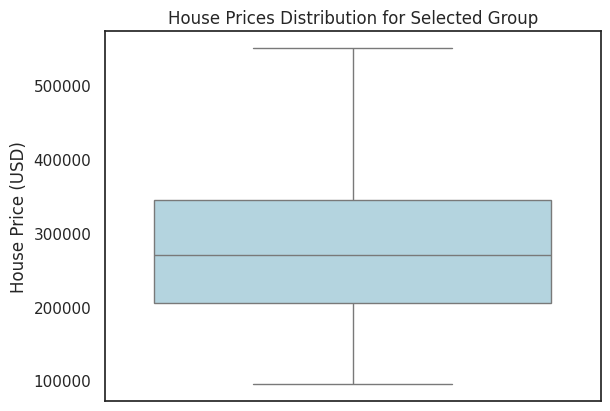

In [2072]:
# plot the house prices for the selected group
sns.boxplot(data=selected_group, y="price", color="lightblue")
plt.title("House Prices Distribution for Selected Group")
plt.ylabel("House Price (USD)")
plt.show()

The chosen group appears to be a solid choice, it shows significant price variation without being excessive, and we also have a good sample size of sales to analyze.

##### Undervalued Houses
Now that we've selected our group of houses, the next step is to identify which properties within this group appear to be undervalued.

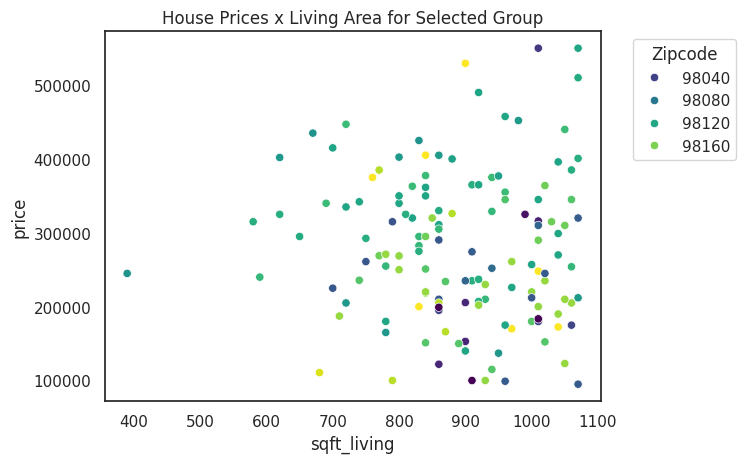

In [2073]:
sns.scatterplot(data=selected_group, x='sqft_living', y='price', hue='zipcode', palette='viridis')
plt.title(f"House Prices x Living Area for Selected Group")
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')

In [2074]:
# analize the price per square foot for the selected group
selected_group_price_per_sqft = selected_group.copy()
selected_group_price_per_sqft['price_per_sqft'] = selected_group['price'] / selected_group['sqft_living']
houses_ranked_by_price_per_sqft = selected_group_price_per_sqft.sort_values('price_per_sqft')
houses_ranked_by_price_per_sqft.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
10585  6198400218 2014-09-19   95000.0         2        1.0         1070   
5303   5128000010 2015-01-05   99000.0         2        1.0          960   
4563   1900000195 2014-06-30  100000.0         2        1.0          930   
15456  8856000545 2014-05-07  100000.0         2        1.0          910   
7226   1446403617 2014-07-02  123000.0         2        1.0         1050   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
10585     20450     1.0           0     0  ...    98058  47.4338 -122.183   
5303       8236     1.0           0     0  ...    98058  47.4698 -122.166   
4563       7623     1.0           0     0  ...    98166  47.4670 -122.349   
15456     22000     1.0           0     0  ...    98001  47.2777 -122.252   
7226       6600     1.5           0     0  ...    98168  47.4828 -122.324   

       sqft_living15  sqft_lot15  distance_to_downtown  sqft_living15_bin  \
10585           1360       15581              0.227931   (1250.0, 1400.0]   
5303            1260        8236              0.214928   (1250.0, 1400.0]   
4563            1300        7641              0.140222   (1250.0, 1400.0]   
15456           1326        9891              0.338125   (1250.0, 1400.0]   
7226            1330        6600              0.123666   (1250.0, 1400.0]   

         sqft_living_bin  year_month  price_per_sqft  
10585  (289.999, 1070.0]     2014-09       88.785047  
5303   (289.999, 1070.0]     2015-01      103.125000  
4563   (289.999, 1070.0]     2014-06      107.526882  
15456  (289.999, 1070.0]     2014-05      109.890110  
7226   (289.999, 1070.0]     2014-07      117.142857  

[5 rows x 26 columns]

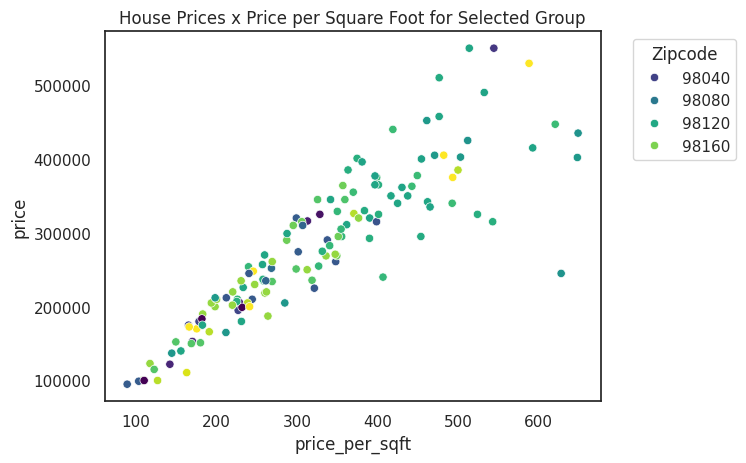

In [2101]:
sns.scatterplot(data=selected_group_price_per_sqft, x='price_per_sqft', y='price', hue='zipcode', palette='viridis')
plt.title(f"House Prices x Price per Square Foot for Selected Group")
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')

In [2076]:
# selecting the house with the lower value per square foot
selected_house = houses_ranked_by_price_per_sqft.iloc[0]
price = selected_house["price"]

In [2077]:
# calculating the average and median price for the zipcode with the best value
zip_code = selected_house["zipcode"]
median = kc_house_df[kc_house_df['zipcode'] == zip_code]["price"].median()
avg = kc_house_df[kc_house_df['zipcode'] == zip_code]["price"].mean()
print(f"Median price for zipcode {zip_code}: {median}")
print(f"Average price for zipcode {zip_code}: {round(avg, 2)}")
print(f"House price: {price}")

Median price for zipcode 98058: 334950.0
Average price for zipcode 98058: 349352.49
House price: 95000.0


In [2078]:
# calculate the average and median price for the selected group
median = selected_group["price"].median()
avg = selected_group["price"].mean()
print(f"Median price for the selected group: {median}")
print(f"Average price for the selected group: {round(avg, 2)}")
print(f"House price: {price}")

Median price for the selected group: 269500.0
Average price for the selected group: 278526.73
House price: 95000.0


In [2079]:
# calculate the average and median price for the condition of the selected house within the selected group
condition = selected_house["condition"]
median = selected_group[selected_group['condition'] == condition]["price"].median()
avg = selected_group[selected_group['condition'] == condition]["price"].mean()
print(f"Median price for condition {condition}: {median}")
print(f"Average price for condition {condition}: {round(avg, 2)}")
print(f"House price: {price}")

Median price for condition 2: 180000.0
Average price for condition 2: 171527.78
House price: 95000.0


In [2099]:
# calculate the average and median price for the condition 3 within the selected group
condition = 3
median = selected_group[selected_group['condition'] == condition]["price"].median()
avg = selected_group[selected_group['condition'] == condition]["price"].mean()
print(f"Median price for condition {condition}: {median}")
print(f"Average price for condition {condition}: {round(avg, 2)}")
print(f"House price: {price}")

Median price for condition 3: 269500.0
Average price for condition 3: 276232.09
House price: 95000.0


In [ ]:
# calculate the average and median price for houses without basement within the selected group
median = selected_group[selected_group['sqft_basement'] == 0]["price"].median()
avg = selected_group[selected_group['sqft_basement'] == 0]["price"].mean()
print(f"Median price for houses without basement: {median}")
print(f"Average price for houses without basement: {round(avg, 2)}")

Median price for houses without basement: 269000.0
Average price for houses without basement: 274719.99


In [2081]:
selected_house

id                               6198400218
date                    2014-09-19 00:00:00
price                               95000.0
bedrooms                                  2
bathrooms                               1.0
sqft_living                            1070
sqft_lot                              20450
floors                                  1.0
waterfront                                0
view                                      0
condition                                 2
grade                                     6
sqft_above                             1070
sqft_basement                             0
yr_built                               1948
yr_renovated                              0
zipcode                               98058
lat                                 47.4338
long                               -122.183
sqft_living15                          1360
sqft_lot15                            15581
distance_to_downtown               0.227931
sqft_living15_bin          (1250

In [2082]:
px.scatter_map(lat=[selected_house["lat"]], lon=[selected_house["long"]], map_style="open-street-map", title="Choosen House Location", zoom=15, height=600, width=800)

##### Results

Pros

- Located in a desirable neighborhood

- Close proximity to downtown

- Large lot size

- Spacious and comfortable living area

- Priced significantly below market average

Cons

- Poor overall condition

- No basement

- Older construction — may require repairs or renovation

Price Overview

- Purchase Price: $95,000

- Estimated Resale (As-Is): $180,000 – $200,000

- Estimated Resale (After Renovation): $250,000 – $300,000

### When Should We Buy a House? When Should We Sell?
We need to identify the time of year when house prices are at their lowest and when they are at their highest.

In [2085]:
# creating a month column from the date
kc_house_df["month"] = kc_house_df["date"].dt.month_name()
kc_house_df["month"].value_counts()

month
May          2275
April        2103
July         2089
June         2055
August       1847
October      1773
March        1772
September    1696
December     1395
November     1342
February     1195
January       925
Name: count, dtype: int64

In [2086]:
# average house prices by month
avg_house_price_by_month = kc_house_df["price"].groupby(kc_house_df["month"]).mean().sort_values(ascending=False).reset_index(name="price")
avg_house_price_by_month["price"] = avg_house_price_by_month["price"].round(2)
avg_house_price_by_month

month      price
0       April  496743.61
1        June  490758.81
2        July  483486.71
3         May  481255.16
4       March  479756.79
5      August  476488.45
6   September  473740.92
7     October  471639.31
8    December  462681.43
9    November  462481.28
10    January  458157.89
11   February  455775.55

<Axes: title={'center': 'Average House Prices by Month'}, xlabel='Month', ylabel='Price $'>

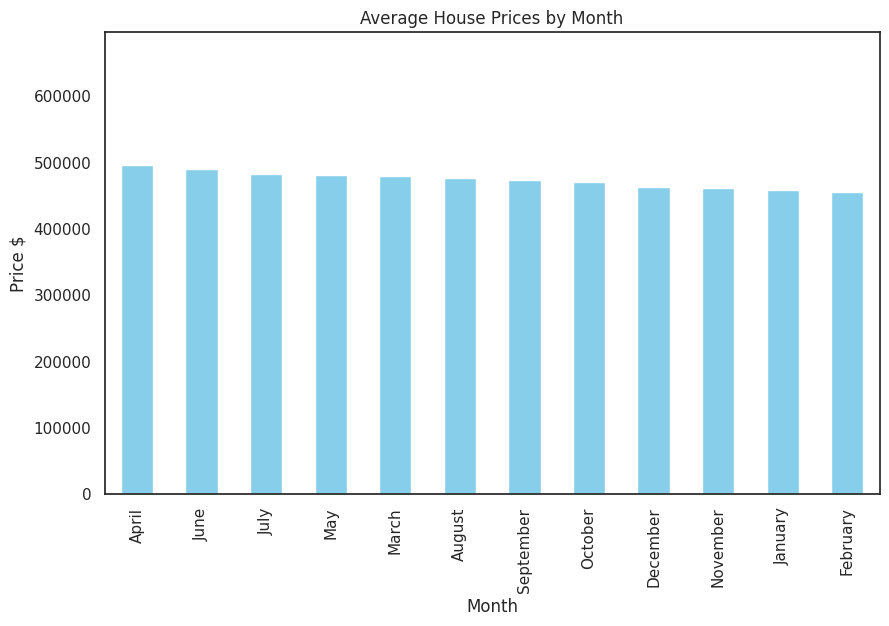

In [2087]:
avg_house_price_by_month.plot(kind="bar", x="month", y="price", title="Average House Prices by Month", xlabel="Month", ylabel="Price $", color="skyblue", figsize=(10, 6), ylim=(0, avg_house_price_by_month["price"].max() + 200000), legend=False)

In [2088]:
april_avg_price = avg_house_price_by_month[avg_house_price_by_month["month"] == "April"]["price"]
february_avg_price = avg_house_price_by_month[avg_house_price_by_month["month"] == "February"]["price"]

avg_price_difference = april_avg_price.values[0] - february_avg_price.values[0]

print(f"The average house price in April is ${april_avg_price.values[0]:,.2f}, while in February it is ${february_avg_price.values[0]:,.2f}. The average difference is ${avg_price_difference:,.2f}.")

The average house price in April is $496,743.61, while in February it is $455,775.55. The average difference is $40,968.06.


We can observe that housing prices tend to be **higher in the spring and summer**, and **lower during the winter**.

When should we buy: **February**

When should we sell: **April**

### Which Upgrades Can We Do to Maximize Profit?
Let’s analyze the features that have the greatest impact on a home's price and try to estimate how much each upgrade can increase its market value.

#### Bathroom

<Axes: title={'center': 'Average House Prices by Number of Bathrooms'}, xlabel='Number of Bathrooms', ylabel='Price $'>

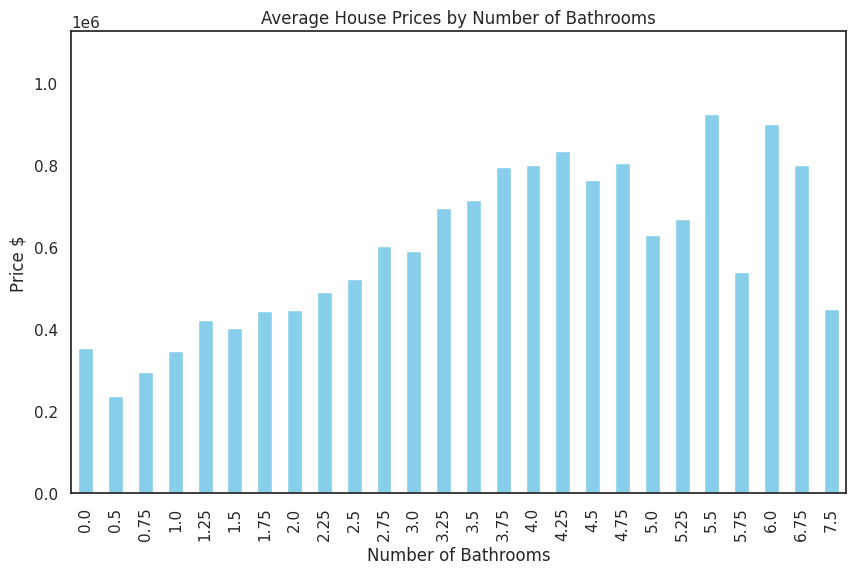

In [2089]:
# average house prices by number of bathrooms
kc_n_bathrooms_price = kc_house_df["price"].groupby(kc_house_df["bathrooms"]).mean().reset_index(name="price")
kc_n_bathrooms_price["price"] = kc_n_bathrooms_price["price"].round(2)
kc_n_bathrooms_price.plot(kind="bar", x="bathrooms", y="price", title="Average House Prices by Number of Bathrooms", xlabel="Number of Bathrooms", ylabel="Price $", color="skyblue", figsize=(10, 6), ylim=(0, kc_n_bathrooms_price["price"].max() + 200000), legend=False)


<Axes: title={'center': 'Number of Houses by Number of Bathrooms'}, xlabel='Number of Bathrooms', ylabel='Number of Houses'>

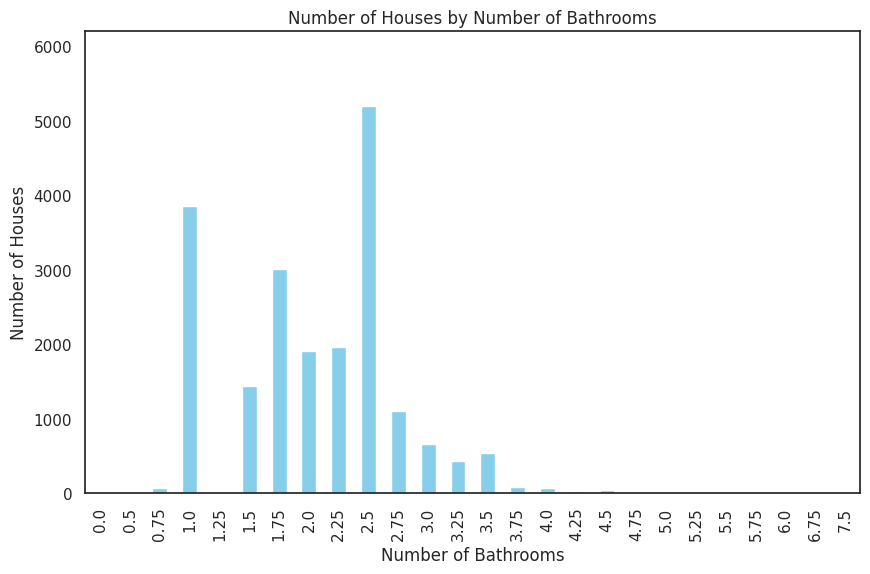

In [2090]:
# number of houses by number of bathrooms
kc_house_df["price"].groupby(kc_house_df["bathrooms"]).count().plot(kind="bar", title="Number of Houses by Number of Bathrooms", xlabel="Number of Bathrooms", ylabel="Number of Houses", color="skyblue", figsize=(10, 6), ylim=(0, kc_house_df["price"].groupby(kc_house_df["bathrooms"]).count().max() + 1000), legend=False)

In [2091]:
# filter bathrooms with more than 500 houses
filtered_bathrooms = kc_house_df["bathrooms"].value_counts()
filtered_bathrooms = filtered_bathrooms[filtered_bathrooms > 500].index

<Axes: title={'center': 'Average House Prices by Number of Bathrooms (Filtered)'}, xlabel='Number of Bathrooms', ylabel='Price $'>

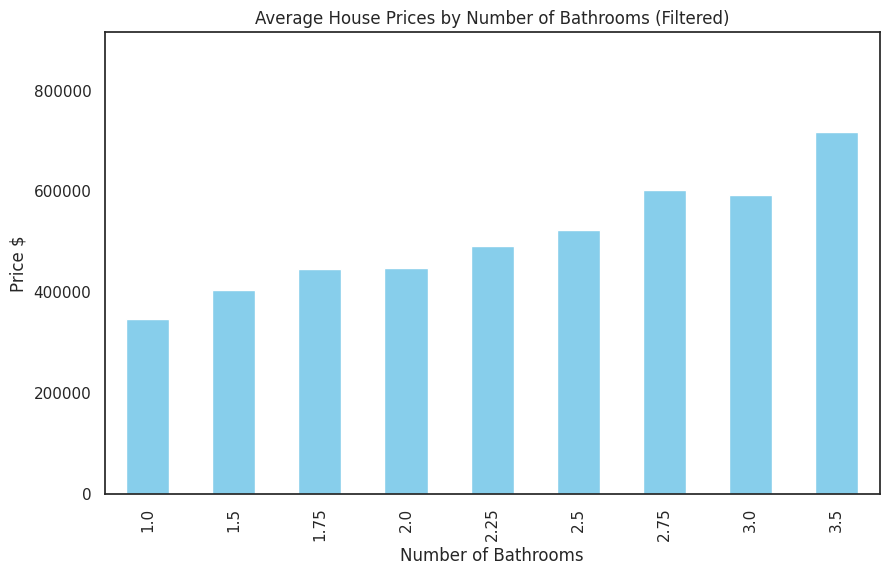

In [2092]:
# average house prices by number of bathrooms (filtered)
kc_n_bathrooms_price = kc_house_df[kc_house_df["bathrooms"].isin(filtered_bathrooms)]
kc_n_bathrooms_price = kc_n_bathrooms_price["price"].groupby(kc_n_bathrooms_price["bathrooms"]).mean().reset_index(name="price")
kc_n_bathrooms_price["price"] = kc_n_bathrooms_price["price"].round(2)
kc_n_bathrooms_price.plot(kind="bar", x="bathrooms", y="price", title="Average House Prices by Number of Bathrooms (Filtered)", xlabel="Number of Bathrooms", ylabel="Price $", color="skyblue", figsize=(10, 6), ylim=(0, kc_n_bathrooms_price["price"].max() + 200000), legend=False)

<Axes: xlabel='bathrooms', ylabel='price'>

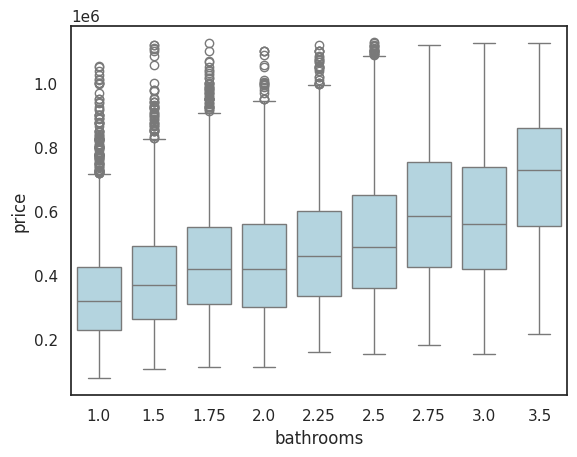

In [2093]:
kc_n_bathrooms_price = kc_house_df[kc_house_df["bathrooms"].isin(filtered_bathrooms)]
sns.boxplot(data=kc_n_bathrooms_price, x="bathrooms", y="price", color="lightblue")

In [ ]:
# function to remove outliers using IQR method
def remove_outliers_iqr(df, group_col, target_col):
    def filter_group(group):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return group[(group[target_col] >= lower) & (group[target_col] <= upper)]

    return df.groupby(group_col, group_keys=False, observed=False, ).apply(filter_group)

/tmp/ipykernel_57891/3623028703.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Axes: xlabel='bathrooms', ylabel='price'>

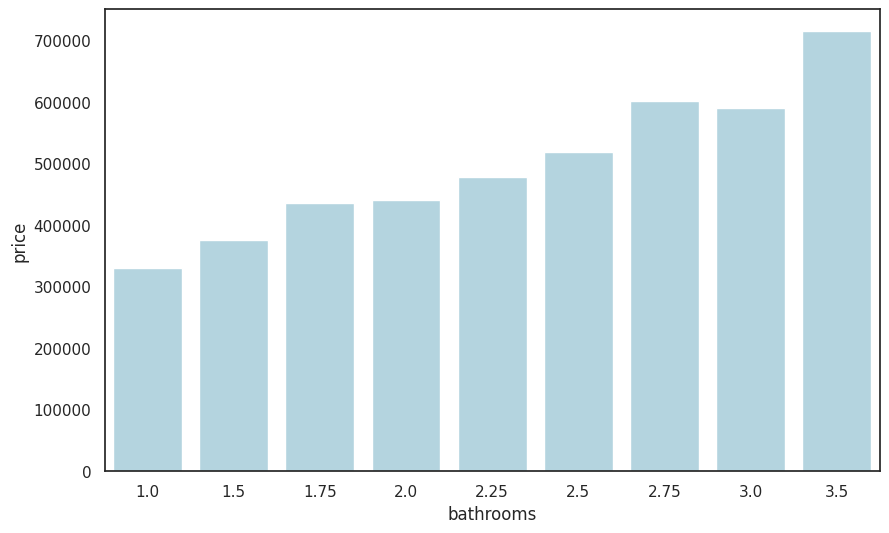

In [2104]:
kc_house_df = remove_outliers_iqr(kc_house_df[kc_house_df["bathrooms"].isin(filtered_bathrooms)], group_col="bathrooms", target_col="price")
kc_n_bathrooms_price = kc_house_df[kc_house_df["bathrooms"].isin(filtered_bathrooms)]
kc_n_bathrooms_price = kc_n_bathrooms_price["price"].groupby(kc_n_bathrooms_price["bathrooms"]).mean().reset_index(name="price")
plt.figure(figsize=(10, 6))
sns.barplot(data=kc_n_bathrooms_price, x="bathrooms", y="price", color="lightblue")

In [2109]:
kc_n_bathrooms_price["price"] = kc_n_bathrooms_price["price"].round(2)
kc_n_bathrooms_price

bathrooms      price
0       1.00  330420.74
1       1.50  376097.22
2       1.75  435595.68
3       2.00  441291.77
4       2.25  477620.07
5       2.50  519313.91
6       2.75  601948.24
7       3.00  591103.09
8       3.50  715348.75

In [ ]:
kc_n_bathrooms_price_diff = {
    kc_n_bathrooms_price["bathrooms"][1]: round(kc_n_bathrooms_price["price"][1] - kc_n_bathrooms_price["price"][0], 2),
    kc_n_bathrooms_price["bathrooms"][2]: round(kc_n_bathrooms_price["price"][2] - kc_n_bathrooms_price["price"][0], 2),
    kc_n_bathrooms_price["bathrooms"][3]: round(kc_n_bathrooms_price["price"][3] - kc_n_bathrooms_price["price"][0], 2)
}

kc_n_bathrooms_price_diff

{np.float64(1.5): np.float64(45676.48),
 np.float64(1.75): np.float64(105174.94),
 np.float64(2.0): np.float64(110871.03)}

Estimated Increase in House Value by Adding Bathrooms:

0.5 bathrooms → +$45,676.48

0.75 bathrooms → +$105,174.94

1.0 bathrooms → +$110,871.03
